# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 8.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# These might be helpful:
#from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [ ]:
df_data.isna().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data_clean = df_data.drop_duplicates()

In [ ]:
df_data_clean.dropna(inplace=True)

In [ ]:
df_data_clean.shape

(4324, 9)

## Descriptive Statistics

In [ ]:
df_data_clean.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


In [ ]:
df_data_clean.dtypes

Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
org_count = df_data_clean.groupby(['Organisation'])['Organisation'].count()

In [ ]:
fig = px.bar(org_count, title="Launches per Organization", labels={'index': 'Organization', 'value': "Launches"})
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
df_status = df_data_clean.groupby(['Rocket_Status'])['Rocket_Status'].count()

In [ ]:
fig = px.bar(df_status, title="Rocket Status")
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
fig = px.bar(df_data_clean.groupby(['Mission_Status'])['Mission_Status'].count(), title="Mission Status")
fig.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
df_data_clean['Price'] = df_data['Price'].str.replace(',', '').astype(float)

<ipython-input-19-bfbe000e11e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clean['Price'] = df_data['Price'].str.replace(',', '').astype(float)


In [ ]:
fig = px.histogram(df_data_clean.sort_values("Price"), x="Price",nbins=10, title="Price of Launch", labels={"Price":"Price Range", "value":"Number of Launches"})
fig.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df_data_clean['Country'] = df_data_clean['Location'].str.split(',').str[-1].str.strip()

<ipython-input-8-ad7e29ddaeec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clean['Country'] = df_data_clean['Location'].str.split(',').str[-1].str.strip()


In [ ]:
df_data_clean.replace(to_replace={
    'Russia': 'Russian Federation',
    'New Mexico': 'UNITED STATES OF AMERICA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'UNITED STATES OF AMERICA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'UNITED STATES OF AMERICA',
    'Iran':"IRAN, ISLAMIC REPUBLIC OF",
    "North Korea": "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",
    "South Korea":"KOREA, REPUBLIC OF"
}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
df_data_country = df_data.groupby(['Country'])['Country'].count()
world_map = px.choropleth(df_data_country,
     locations=df_data_country.index,
     locationmode='country names',
     color=df_data_country.values,
     hover_name='Country',
     color_continuous_scale=px.colors.sequential.matter)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
df_data_country_failure = df_data.groupby('Country')['Mission_Status'].apply(lambda x: (x!='Success').sum())
world_map = px.choropleth(df_data_country_failure,
     locations=df_data_country_failure.index,
     locationmode='country names',
     color=df_data_country_failure.values,
     hover_name=df_data_country_failure.index,
     color_continuous_scale=px.colors.sequential.matter)
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
fig = px.sunburst(
    df_data, path=['Country','Organisation','Mission_Status']
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_data["Price"] = df_data["Price"].fillna(0)

In [ ]:
total_money = df_data_clean.groupby('Organisation')['Price'].sum()

In [ ]:
fig = px.bar(total_money,  title="Money Spent By organization", labels={'index': 'Organization', 'value': "Money"})
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_org = pd.DataFrame({'Launches': org_count})

In [ ]:
df_org['total_money'] = total_money

In [ ]:
df_org['Money_per_launch'] = df_org['total_money']/df_org['Launches']

In [ ]:
fig = px.bar(df_org,  y='Money_per_launch', title="Organizational price per launch", labels={'index': 'Organization', 'value': "Money"})
fig.show()

# Chart the Number of Launches per Year

In [ ]:
df_data_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [ ]:
df_data_clean['Date'] = pd.to_datetime(df_data['Date'].str.slice(start=0, stop=16), format="%a %b %d, %Y")

<ipython-input-7-7f6b8daf89fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clean['Date'] = pd.to_datetime(df_data['Date'].str.slice(start=0, stop=16), format="%a %b %d, %Y")


In [ ]:
Launches_per_Year = df_data_clean.groupby(df_data_clean.Date.dt.year)['Country'].count()

In [ ]:
fig = px.bar(Launches_per_Year,  title="Launches per Year", labels={'index': 'Date', 'value': "Launches"})
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
Launches_per_month = df_data_clean.groupby(pd.Grouper(key='Date', freq='M'))['Country'].count()

In [ ]:
Launches_per_month_ave = Launches_per_month.rolling(6).mean()

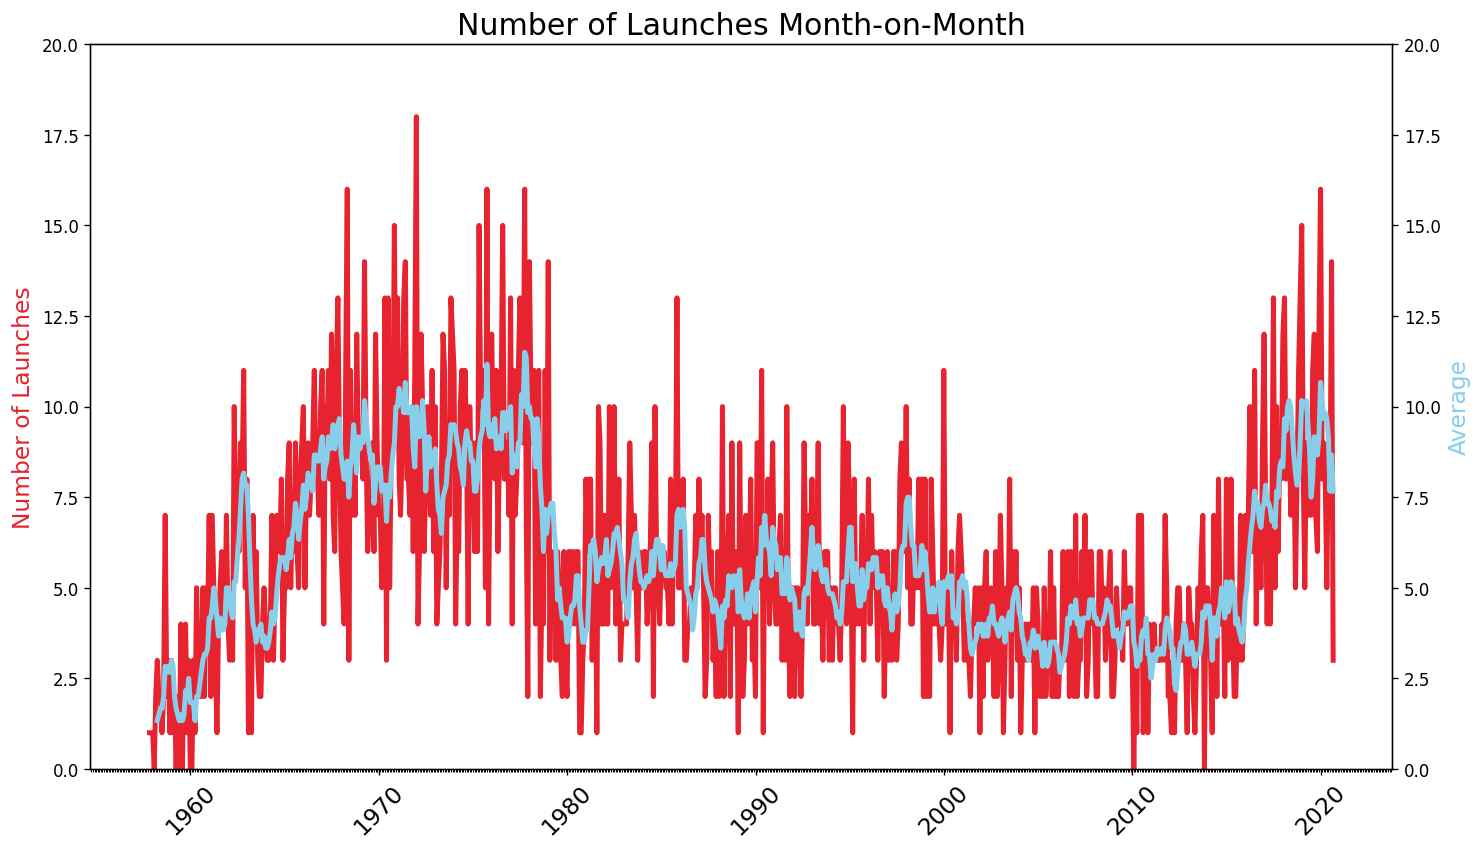

In [ ]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=120)
plt.title('Number of Launches Month-on-Month', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('Number of Launches', color='#E6232E', fontsize=14)
ax2.set_ylabel('Average', color='skyblue', fontsize=14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 20])
ax2.set_ylim([0, 20])
# ax1.set_xlim([Launches_per_month.min(), Launches_per_month.max()])

ax1.plot(Launches_per_month.index, Launches_per_month.values, color='#E6232E', linewidth=3)
ax2.plot(Launches_per_month_ave.index, Launches_per_month_ave.values, color='skyblue', linewidth=3)

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
monthly_launches = df_data_clean.groupby(df_data_clean.Date.dt.month)['Organisation'].count()

In [ ]:
fig = px.bar(monthly_launches,  title="Launches by month", labels={'index': 'Month', 'value': "Launches"})
fig.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
df_valid_prices = df_data_clean.dropna(subset=['Price'])

In [ ]:
df_valid_prices['Average'] = df_valid_prices['Price'].rolling(6).mean()

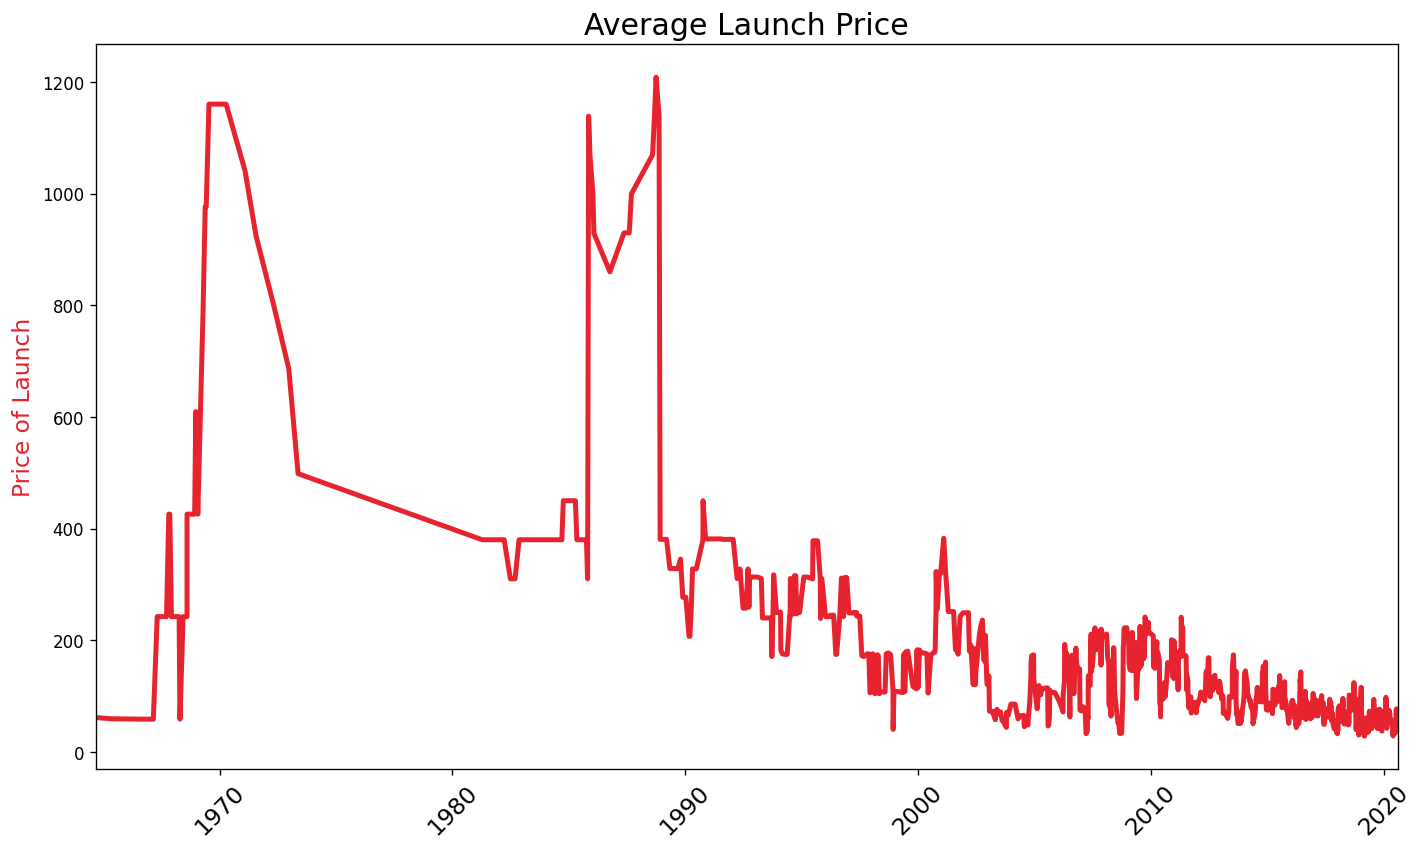

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Average Launch Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()

ax1.set_ylabel('Price of Launch', color='#E6232E', fontsize=14)

# Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
ax1.set_xlim([df_valid_prices.Date.min(), df_valid_prices.Date.max()])

ax1.plot(df_valid_prices.Date, df_valid_prices.Average, color='#E6232E', linewidth=3)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
list_top_10 = df_data_clean['Organisation'].value_counts()[:10].index.tolist()

In [ ]:
df_top_10 = df_data_clean[df_data_clean['Organisation'].isin(list_top_10)]

In [ ]:
df_top_10_pivot = df_top_10.groupby([df_top_10.Date.dt.year, df_top_10.Organisation])['Organisation'].count().unstack('Organisation')

In [ ]:
fig = px.line(df_top_10_pivot, title='Number of Launches over Time by the Top 10 Organisations', labels={'value':'Launches'})
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
df_cold_war = df_data_clean[df_data_clean['Date']<pd.to_datetime('1992', format="%Y")]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
df_cold_war.replace(to_replace={
    'Russia': 'USSR',
    'Kazakhstan': 'USSR',
}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
series_cold_war_launches = df_cold_war.groupby('Country')['Country'].count().sort_values(ascending=False)[:2]

In [ ]:
fig = px.pie(series_cold_war_launches,
             values=series_cold_war_launches.values,
             names=series_cold_war_launches.index, title='USA vs. USSR Launches')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
df_cold_war_clean = df_cold_war[(df_cold_war['Country'] == 'USA') | (df_cold_war['Country'] == 'USSR') ]

In [ ]:
df_cold_war_launch_per_year = df_cold_war_clean.groupby([df_cold_war.Date.dt.year, df_cold_war_clean.Country])['Country'].count().unstack('Country')

In [ ]:
fig = px.line(df_cold_war_launch_per_year, title='Number of Launches per year by USA and USSR', labels={'value':'Launches'})
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
df_cold_war_clean_failures = df_cold_war_clean[df_cold_war_clean['Mission_Status'] == 'Failure']
df_cold_war_launch_failures_per_year = df_cold_war_clean_failures.groupby([df_cold_war_clean_failures.Date.dt.year, df_cold_war_clean_failures.Country])['Country'].count().unstack('Country')
fig = px.line(df_cold_war_launch_failures_per_year, title='Number of Launch Failures per year by USA and USSR', labels={'value':'Launch Failures'})
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
df_cold_war_pct_failure = pd.DataFrame()
df_cold_war_pct_failure['USA'] = df_cold_war_launch_failures_per_year['USA']/df_cold_war_launch_per_year['USA']
df_cold_war_pct_failure['USSR'] = df_cold_war_launch_failures_per_year['USSR']/df_cold_war_launch_per_year['USSR']

In [ ]:
fig = px.line(df_cold_war_pct_failure, title='Percent of Launch Failures per year by USA and USSR', labels={'value':'Launch Failure %'})
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
country_list_top_10 = df_data_clean['Country'].value_counts()[:10].index.tolist()
df_top_10_country = df_data_clean[df_data_clean['Country'].isin(country_list_top_10)]
df_top_10_country_pivot = df_top_10_country.groupby([df_top_10_country.Date.dt.year, df_top_10_country.Country])['Country'].count().unstack('Country')

In [ ]:
fig = px.bar(df_top_10_country_pivot, barmode = 'overlay', title='Total Launches', labels={'value':'Number of Launches'})
fig.show()

In [ ]:
df_top_10_country_success = df_top_10_country[df_top_10_country['Mission_Status'] == 'Success']
df_top_10_country_success_pivot = df_top_10_country_success.groupby([df_top_10_country_success.Date.dt.year, df_top_10_country_success.Country])['Country'].count().unstack('Country')
fig = px.bar(df_top_10_country_success_pivot, barmode = 'overlay', title='Total Launch Successes', labels={'value':'Number of Successful Launches'})
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
df_top_10_pivot2 = df_data_clean.groupby([df_data_clean.Date.dt.year, df_data_clean.Organisation])['Organisation'].count().unstack('Organisation')
fig = px.bar(df_top_10_pivot2, barmode = 'overlay', title='Launches by Organisation', labels={'value':'Number of Launches'})
fig.show()